<a href="https://colab.research.google.com/github/MiroGasparek/DeepLearningCourse/blob/master/keras_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the necessary dependencies
import numpy as np
np.random.seed(123) # for reproducibility

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

# Import load_model for saving
from keras.models import load_model
import h5py

from keras.models import model_from_json

# Import matplotlib for plotting
import matplotlib.pyplot as plt

from keras.datasets import mnist


Using TensorFlow backend.


# **Introduction to Keras**

## Loading datasets from Keras 
We load the image MNIST standard dataset partitioned into their corresponding labels for test data and train data. Also, we vizualize the data, both the input data (hand-written figures) and the labels. 

In [0]:
# Now load the data, shuffled and split between the train and test sets
(X_train, y_train),(X_test, y_test) = mnist.load_data()

Image shape: (28, 28)
Total number of training samples: 60000
Total number of test samples: 10000


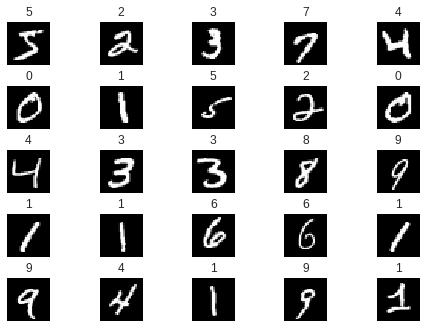

In [3]:
# Look at the images 
print('Image shape: {0}'.format(X_train.shape[1:]))
print('Total number of training samples: {0}'.format(X_train.shape[0]))
print('Total number of test samples: {0}'.format(X_test.shape[0]))

# Display some of the images
N = 5
start_val = 0 # an element for the code to plot the following N**2 values
fig, axes = plt.subplots(N, N)
items = list(range(0, 10))

for row in range(N):
  for col in range(N):
    index = start_val + row + N*col
    axes[row,col].imshow(X_train[index], cmap='gray')
    fig.subplots_adjust(hspace=0.5)
    y_target = int(y_train[index])
    target = str(items[y_target])
    axes[row,col].set_title(target)
    axes[row,col].set_xticks([])
    axes[row,col].set_yticks([])

## Preprocessing the Keras dataset
We will train a simple model to classify the digits on MNIST dataset. To do this, we will reshape images to have a single dimension. Hence the same network could be used for any 1D data. When using Convolutional Neural Network (CNN), we must define a 3D shape for images (depth, width, height) and it will get much higher results.

In [4]:
X_train_flatten = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

print('Old X_train shape: {0}'.format(X_train.shape))
print('New X_train shape: {0}'.format(X_train_flatten.shape))

# Normalize the dataset to the range [0,1] and it will be ready for training the model

X_train_flatten = X_train_flatten.astype('float32')
X_test_flatten = X_test_flatten.astype('float32')
X_train_flatten /= 255
X_test_flatten /= 255

Old X_train shape: (60000, 28, 28)
New X_train shape: (60000, 784)


Now the data are ready. To train the model, we also need to make ready the labels. The `y_train` and `y_test` labels are not split into 10 distinct labels, but rather are represented as a single array with the class values. This is good for regression problem, but we want to make a classifier. So we convert 1D value to 10D vector, each dimension representing one digit value.

In [5]:
# Convert the 1D labels value to 10D vector
Y_train_class = np_utils.to_categorical(y_train,10)
Y_test_class = np_utils.to_categorical(y_test,10)

print('New Y_train shape: {0}'.format(Y_train_class.shape))

New Y_train shape: (60000, 10)


## Model Architecture
Model architecture definition is a critical step when trying to solve a task. Here we start from the simplest model and then we go to the more complex examples. 

We first declare a sequential model, which is a linear stack of neural network layers, by passing a list of layer isntances to the constructor.

In [6]:
model = Sequential()

# Add a fully connected neural network layer with the information about the input, other layers can do inference
model.add(Dense(10, input_dim=784)) 
# Add the appropriate activation function, in this case softmax
model.add(Activation('softmax'))

# Check model shape output
print(model.output_shape)

Instructions for updating:
Colocations handled automatically by placer.
(None, 10)


The dense layer in the model is a fully connected layer with the first parameter being the output size of the layer. Subsequently, Keras automatically handles the connections between layers. The final layer has an output size of 10, corresponding to the 10 classes of digits.

In [7]:
# Check how the model look like
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Compilation
Before we start training, we need to configure the learning process, which is done via `compile` method. We need to define three important parameters here : 
* The loss function that the model will try to minimize
* The optimiser to minimize the loss function
* The list of metrics you want the model to compute

We are doing classification, so we will define the `categorical_crossentropy` as the loss function and we will compute the accuracy metric. There are many other parameters I will explore later, but for now, I will keep them as default.



In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Training
In order to train the model, we use the module `fit()`. We need to define the batch size and the number of total epochs the model is going to train. Once done, we can finally train the classifier! 

In [9]:
history = model.fit(X_train_flatten, Y_train_class, batch_size=32, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.4690 - acc: 0.8763
Epoch 2/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.3035 - acc: 0.9156
Epoch 3/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.2829 - acc: 0.9207
Epoch 4/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.2731 - acc: 0.9240
Epoch 5/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.2664 - acc: 0.9253
Epoch 6/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.2617 - acc: 0.9274
Epoch 7/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.2584 - acc: 0.9288
Epoch 8/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.2552 - acc: 0.9298
Epoch 9/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2528 - acc: 0.9301
Epoch 10/10
60000/60000 [===========================

Now we might want to train the model until it converges and we do not know how many epochs it will take. We can use callbacks to define the early-stopping rules. In addition, we can use those callbacks to save the model's weights or log history along the training process. We will later see some examples. 

Sometimes, the training curves can give some information. In order to visualize them, we could use the information saved on the training history:

Text(0.5, 0, 'Epoch')

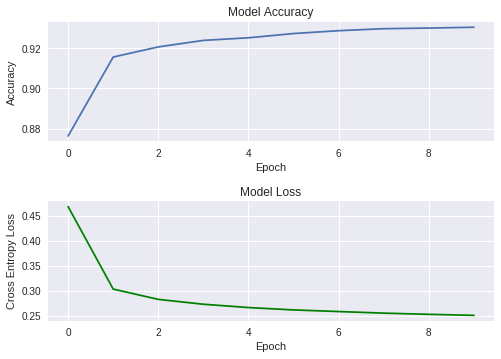

In [10]:
fig, axes = plt.subplots(2,1)
axes[0].plot(history.history['acc'])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')

fig.subplots_adjust(hspace=0.5)

axes[1].plot(history.history['loss'],'g')
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Cross Entropy Loss')
axes[1].set_xlabel('Epoch')

## Evaluating model
Now we can evaluate the model on the test data:

In [11]:
score = model.evaluate(X_test_flatten, Y_test_class, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.26382898873090743
Test accuracy:  0.9265


## Training a simple multi-layer perceptron
Previously, we have trained the simplest network. Here we show how to combine the different sequential layers and we define more complex model in order to see how that affects final test accuracy.

In [12]:
model2 = Sequential()
model2.add(Dense(100, activation='relu', input_shape=(784,)))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

model2.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


We have increased the number of parameters 10-fold just in a few lines! Now we are using an extra dense layer, this one having a higher number of units. The number of units defines the dimensionality of the output space, that is why, we need the last layer to have the same number of digit classes. 

In addition, we use ReLU (rectified linear unit) activation function in first dense layer. We also added a Dropout layer, which is a method for regularising the model in order to prevent overfitting. 

Here we can train the new model and visualize the model curves: 


Epoch 1/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.3210 - acc: 0.9083
Epoch 2/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.1571 - acc: 0.9530
Epoch 3/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.1198 - acc: 0.9645
Epoch 4/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.1013 - acc: 0.9687
Epoch 5/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.0882 - acc: 0.9723
Epoch 6/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0785 - acc: 0.9756
Epoch 7/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0706 - acc: 0.9777
Epoch 8/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0659 - acc: 0.9788
Epoch 9/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0600 - acc: 0.9800
Epoch 10/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0562 - acc: 0.9

Text(0.5, 0, 'Epoch')

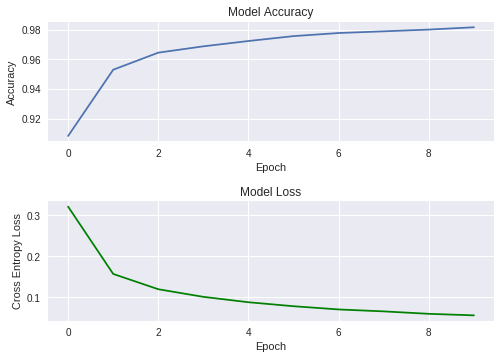

In [13]:
# Compile the model, set the loss, select optimizer, and the metrics
model2.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

# Fit the model 
history2 = model2.fit(X_train_flatten, Y_train_class, batch_size=32, epochs=10)

fig, axes = plt.subplots(2,1)
axes[0].plot(history2.history['acc'])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')

fig.subplots_adjust(hspace=0.5)

axes[1].plot(history2.history['loss'], 'g')
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Cross Entropy Loss')
axes[1].set_xlabel('Epoch')

## Saving/Loading model

In [0]:
# Save the model as HDF5 file
model.save('my_first_model.h5') # Creates a HDF5 file 'my_model.h5'
del model # Deletes the existing model

# Load a compiled model identical to the previous one
model = load_model('my_first_model.h5')


Save model and weights independently:

In [0]:
model.save_weights('my_first_model_weights.h5') # Creates a HDF5 file with the corresponding names

with open('my_first_model_architecture.json','w') as f:
  f.write(model.to_json()) # Creates a json file 'my_first_model_architecture,json'

Load the model without having to instantiate it

In [0]:
# Model reconstruction from JSON file
with open('my_first_model_architecture.json','r') as f:
  model = model_from_json(f.read())

If we do not load the model, but we have instantiated it, we can then load the weights directly:

In [0]:
model.load_weights('my_first_model_weights.h5')

Imagine now that we modify the model and the new model shares some layers in common with the saved one. This situation is common when you do things like fine-tuning or transfer-learning, among others. We could then load the weights into a different architecture by layer name:

In [0]:
model.load_weights('my_first_model_weights.h5', by_name=True)

## Obtaining an output of an intermediate layer

Sometimes we need to check how features of intermediate layers look like. This can be used for extracting features, but also for debugging purposes. That is why, we need to see how we can extract information of a trained architecture.

The easiest way is to define a new model that will have as final output the given output of an specific layer. We first define the model:

In [19]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,), name='first_dense'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', input_shape=(784,), name='second_dense'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax', name='final_dense'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_dense (Dense)          (None, 64)                50240     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
second_dense (Dense)         (None, 128)               8320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
final_dense (Dense)          (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


Now, we specify the name of the layer in which we are interested to obtain the output, in our example, it is the first dense layer:

In [20]:
from keras.models import Model

layer_name = 'second_dense'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(X_test_flatten)
final_output = model.predict(X_test_flatten)

print('Second dense layer output shape: {0}'.format(intermediate_output.shape))
print('Final output shape: {0}'.format(final_output.shape))

Second dense layer output shape: (10000, 128)
Final output shape: (10000, 10)


Alternatively, we can build a Keras function that returns the output of a certain layer given a certain input, for example: 

In [21]:
from keras import backend as K

get_second_dense_layer_output = K.function([model.layers[0].input],
                                           [model.layers[2].output])

intermediate_output = get_second_dense_layer_output([X_test_flatten])[0]
final_output = model.predict(X_test_flatten)

print('Second dense layer output shape: {0}'.format(intermediate_output.shape))
print('Final output shape: {0}'.format(final_output.shape))



Second dense layer output shape: (10000, 128)
Final output shape: (10000, 10)


## Using a Callback Function

Controlling and managing callbacks is essential when training big models. Sometimes we want the network to train until it converges, but we are not able to determine the number of epochs it will take, therefore we need some mechanism to stop it. Let's see how this works, i. e. stop the training whne the validation loss is not decreasing anymore:

In [22]:
from keras.callbacks import EarlyStopping

# Define the metric that will determine the earlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# We use an already training model to speed up the example
model2.fit(X_train_flatten, Y_train_class, validation_split=0.2,
           batch_size=32, callbacks=[early_stopping])

Train on 48000 samples, validate on 12000 samples
Epoch 1/1
48000/48000 [==============================] - 5s 102us/step - loss: 0.0515 - acc: 0.9831 - val_loss: 0.0263 - val_acc: 0.9921


We can combine multiple callbacks when calling the fit module.

## Freezing Keras Layers 

Sometime we need to fix weights of some layers, meaning that we will exclude them from training, i. e. their weights will never be updated. This is useful in the context of fine-tuning a model, or, for instance, when using fixed embeddings for text inputs. 

To do so, we can pass a trainable argument (Boolean) to a layer constructor to set a layer to be non-trainable:

In [0]:
frozen_layer = Dense(32, trainable=False)

Additionally, we can set the `trainable` property of a layer to `True` or `False ` after instantiation. For this to take effect, we will need to call compile() on our model after modifying the trainable property:

In [25]:
from keras.models import clone_model

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(784,)))

# We clone model in frozen_model
frozen_model = clone_model(model)
frozen_model.layers[0].trainable = False

# with this model the weights of the layer will be updated during training
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# in the model below, the weights of `layer` will not be updated during training
frozen_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()
frozen_model.summary()

score_untrained = model.evaluate(X_test_flatten, Y_test_class, verbose=0)
score_frozen_untrained = frozen_model.evaluate(X_test_flatten, Y_test_class, verbose=0)

# Uupdate the weights of `layer`
print('Train Models:/n')
model.fit(X_train_flatten, Y_train_class, batch_size=32, epochs=5)

# Next operation will NOT update the weights of `layer`.
# (which will also affect the above model since it uses the same layer instance)
frozen_model.fit(X_train_flatten, Y_train_class, batch_size=32, epochs=5)

score = model.evaluate(X_test_flatten, Y_test_class, verbose=0)
score_frozen = frozen_model.evaluate(X_test_flatten, Y_test_class, verbose=0)

print('Before Training: Trainable Model Test Accuracy:', score_untrained[1])
print('After Training:  Trainable Model Test Accuracy:', score[1])

print('Before Training: Frozen Model Test Accuracy:', score_frozen_untrained[1])
print('After Training:  Frozen Model Test Accuracy:', score_frozen[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 0
Non-trainable params: 7,850
_________________________________________________________________
Train Models:/n
Epoch 1/5
60000/60000 [==============================] - 3s 48us/step - loss: nan - acc: 0.1107
Epoch 2/5
60000/60000 [==============================] - 3s 42us/step - loss: nan - acc: 0.0987
Epoch 3/5
60000/60000 [==============================] - 3s 42us/step - loss: nan - acc: 0.0987
Epoch 4/5
60000/60000 [=========